In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set_style('darkgrid')

In [2]:
df_ind = pd.read_csv('ANLSYS2/FITFULL/ACT1.csv',index_col = 0)

In [3]:
df_ind.head()

,Lambda,Max_act,speed,speed_std,persistance
0,3400.0,30.0,6.658609,2.134081,3.957992
1,4000.0,80.0,4.265537,1.058332,100.000000
2,2000.0,100.0,3.268182,1.078650,27.178809
3,2200.0,70.0,3.865931,0.900719,9.777233
4,4000.0,90.0,3.959869,1.001579,55.750625


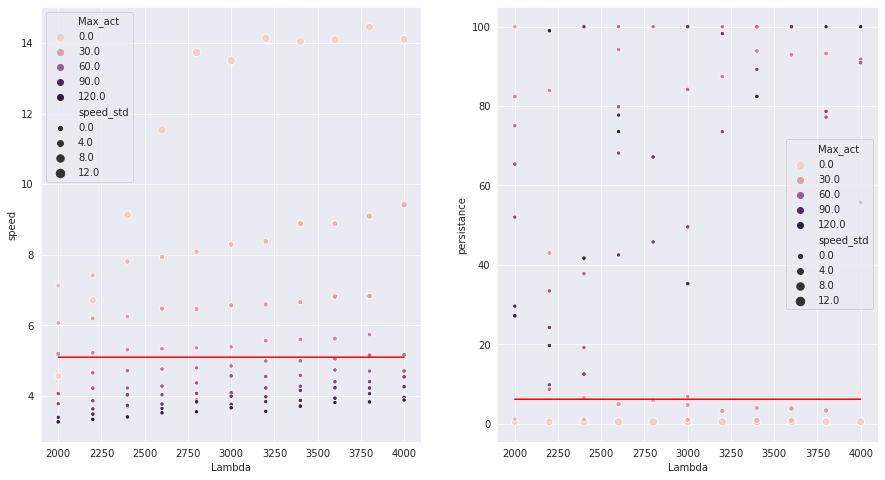

In [5]:
# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax1,legend = 'brief')
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax2, legend = 'brief')
#sns.scatterplot(x = 'Lambda',y = 'pooled_pers',hue = 'Max_act',data = ZOOM_act, ax = ax3, legend = 'full')

#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(2000,4000),[5.10] * 2000,c = 'r')
# ax2.plot(range(0,3000),[3.84] * 3000,c = 'r')
ax2.plot(range(2000,4000),[6.15] * 2000,c = 'r')
plt.show()

In [7]:
def cumul_err(x):
    # unpack : 
    speed = x[0]
    uspeed = x[1]
    lspeed = x[2]
    pers = x[3]

    
    s_ = 5.104099
    p_ = 6.146018
    
    cum_err = abs(s_ - speed) + abs(s_ - uspeed) + abs(s_ - lspeed) + abs(p_ - pers)
    return cum_err

merged = df_ind
merged['upper_speed'] = merged.speed + merged.speed_std
merged['lower_speed'] = merged.speed - merged.speed_std

merged['Error'] = merged[['speed','upper_speed','lower_speed','persistance']].apply(cumul_err,axis = 1)
# find minumum :
min_err = min(merged.Error)
opt_params = merged[merged.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,speed,speed_std,persistance,upper_speed,lower_speed,Error
30,3000.0,40.0,5.391742,0.865991,6.877254,6.257733,4.525751,2.750861
